## This is my analysis and feature selection on tabular data (data that uses rows and columns) for a hotel.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("first inten project.csv")
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [3]:
df['booking status'].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

- let's change the output string into binary 0,1 for classifaction

In [4]:
df['booking status'] = df['booking status'].map({'Not_Canceled': 0, 'Canceled': 1})

- now let's drop the useless columns for our model

In [5]:
print(df['room type'].unique(),df['market segment type'].unique(),df['type of meal'].unique())

['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3'] ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary'] ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']


In [6]:
df['room type'] = df['room type'].str.extract('(\d+)').astype(int)

market_segment_mapping = {label: idx for idx, label in enumerate(df['market segment type'].unique())}
df['market segment type'] = df['market segment type'].map(market_segment_mapping)

meal_mapping = {label: idx for idx, label in enumerate(df['type of meal'].unique())}
df['type of meal'] = df['type of meal'].map(meal_mapping)

- let's clean the code first check if there's null values

In [7]:
print(df.isnull().sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [8]:
df['average price '] = pd.to_numeric(df['average price '], errors='coerce')

In [9]:
corr = df.corr(numeric_only=True)

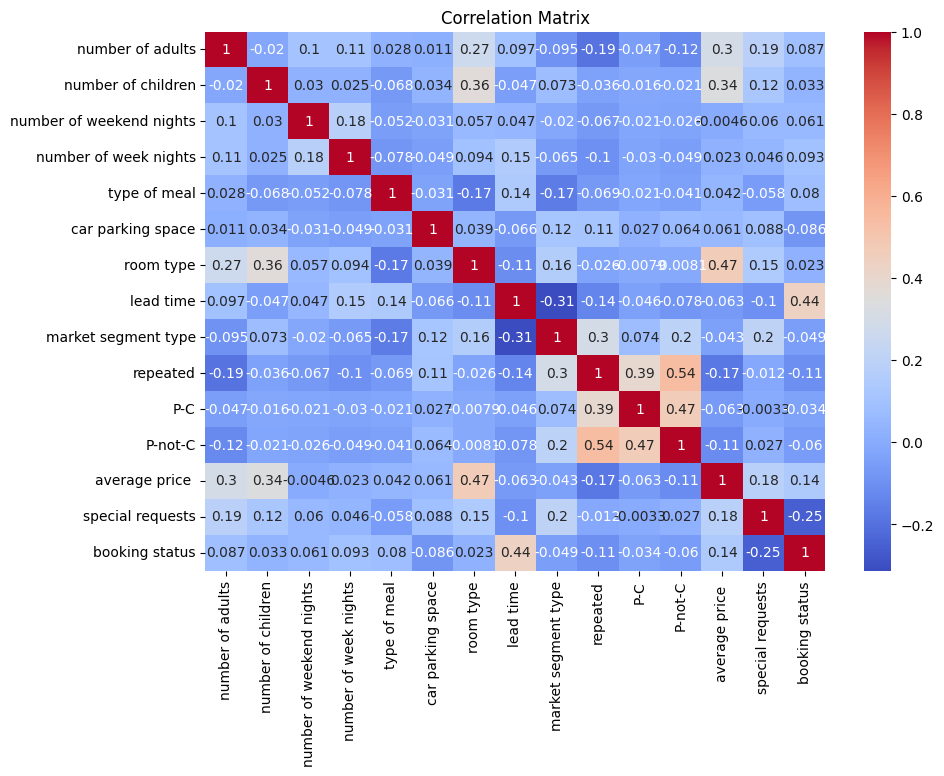

In [10]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- We can see that P-C and P-not-C have correlation with each other and the column repeated

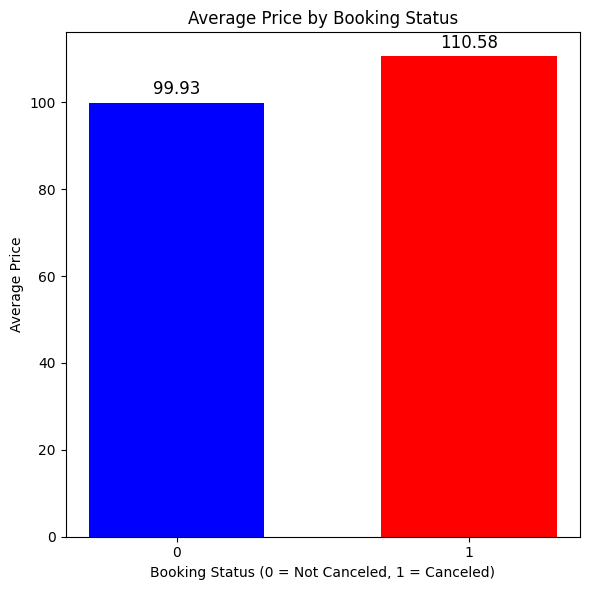

In [11]:
avg_price = df.groupby('booking status')['average price '].mean()
plt.figure(figsize=(6, 6))
bars = plt.bar(avg_price.index.astype(str), avg_price.values, color=['blue', 'red'], width=0.6)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.2f}', ha='center', fontsize=12)
plt.title('Average Price by Booking Status')
plt.xlabel('Booking Status (0 = Not Canceled, 1 = Canceled)')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

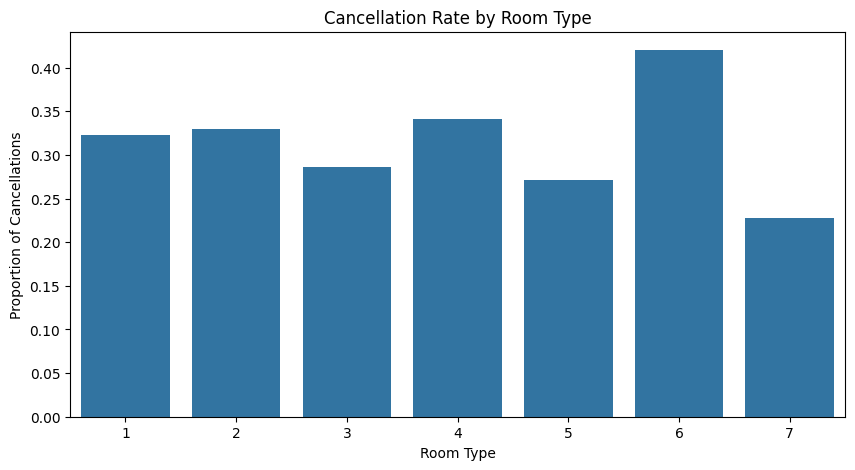

In [12]:
# Barplot showing cancellation rates for each room type
plt.figure(figsize=(10, 5))
cancel_rate_by_room = df.groupby('room type')['booking status'].mean().sort_values(ascending=False)
sns.barplot(x=cancel_rate_by_room.index, y=cancel_rate_by_room.values)
plt.title("Cancellation Rate by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Proportion of Cancellations")
plt.show()


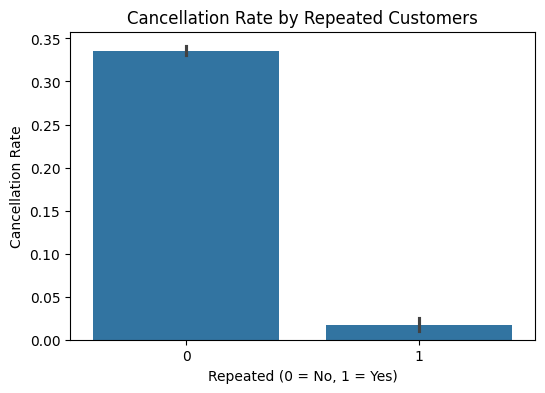

In [13]:
plt.figure(figsize=(6, 4))
sns.barplot(x='repeated', y='booking status', data=df)
plt.title("Cancellation Rate by Repeated Customers")
plt.xlabel("Repeated (0 = No, 1 = Yes)")
plt.ylabel("Cancellation Rate")
plt.show()

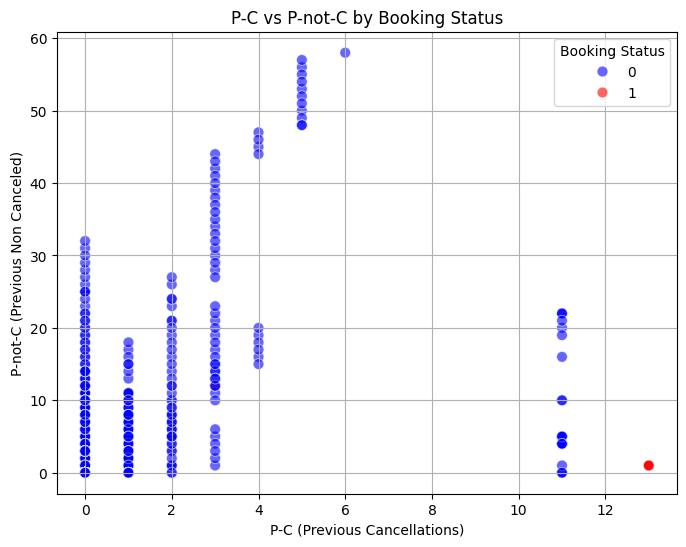

In [14]:
df.columns = df.columns.str.strip()
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='P-C',
    y='P-not-C',
    hue='booking status',
    palette={1: 'red', 0: 'blue'},
    alpha=0.6,
    s=60
)
plt.title("P-C vs P-not-C by Booking Status")
plt.xlabel("P-C (Previous Cancellations)")
plt.ylabel("P-not-C (Previous Non Canceled)")
plt.legend(title="Booking Status")
plt.grid(True)
plt.show()


In [15]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [16]:
df.nunique()

Booking_ID                  36285
number of adults                5
number of children              6
number of weekend nights        8
number of week nights          18
type of meal                    4
car parking space               2
room type                       7
lead time                     352
market segment type             5
repeated                        2
P-C                             9
P-not-C                        59
average price                3930
special requests                6
date of reservation           553
booking status                  2
dtype: int64

In [17]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.324073,0.030977,1.708860,85.239851,0.804575,0.025630,0.023343,0.153369,103.421636,0.619733,0.327656
std,0.518813,0.402704,0.870590,1.410946,0.634123,0.173258,1.399801,85.938796,0.646839,0.158032,0.368281,1.753931,35.086469,0.786262,0.469365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,57.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,126.000000,1.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,7.000000,443.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  int64  
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  int32  
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  int64  
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [19]:
# Drop non-numeric and label columns
numeric_cols = [
    'number of adults',
    'number of children',
    'number of weekend nights',
    'number of week nights',
    'type of meal',
    'car parking space',
    'room type',
    'lead time',
    'market segment type',
    'repeated',
    'P-C',
    'P-not-C',
    'average price',
    'special requests'
]


In [20]:
import pandas as pd

outlier_indices = set()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outlier_indices.update(outliers)

print(f"Total rows with outliers: {len(outlier_indices)}")


Total rows with outliers: 24931


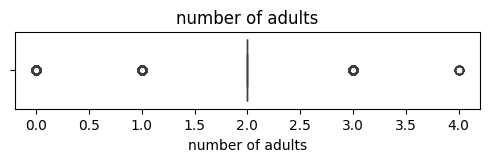

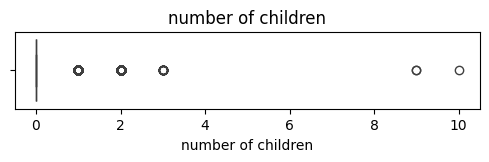

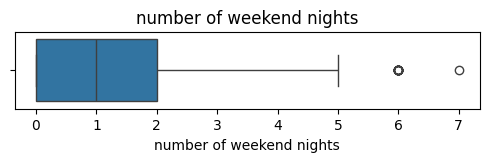

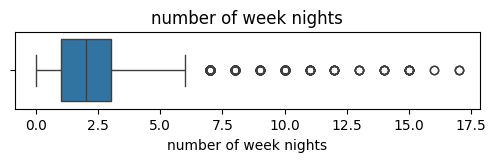

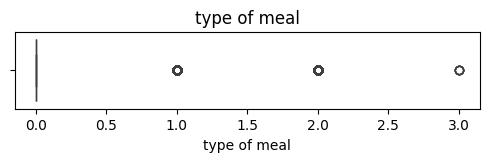

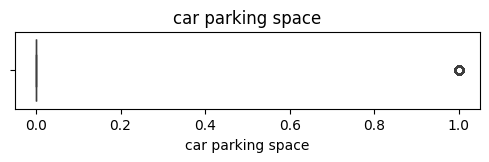

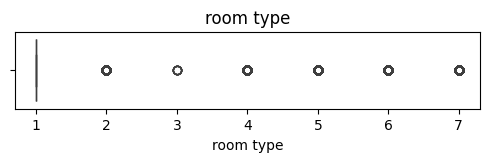

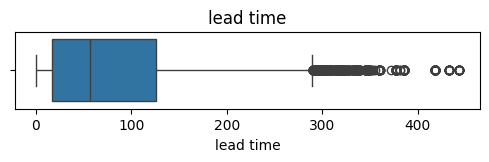

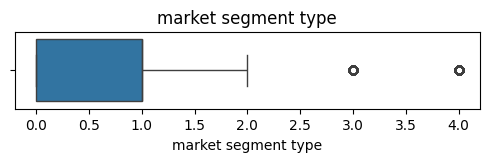

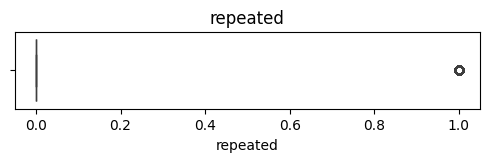

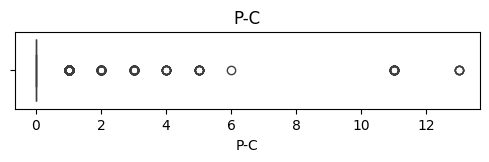

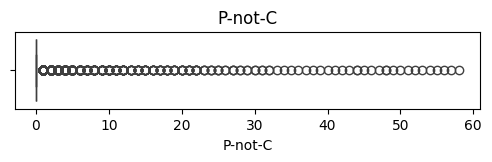

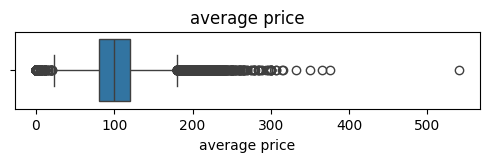

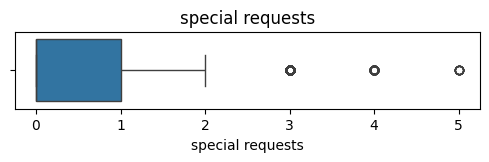

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


In [22]:
X_cleaned = df.drop(index=outlier_indices)
y_cleaned = df.drop(index=outlier_indices)


In [23]:
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')

In [24]:
X = X_cleaned.drop(columns=['booking status','Booking_ID','date of reservation'], axis=1)
y = y_cleaned['booking status']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [26]:
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [27]:
from sklearn.metrics import accuracy_score


In [28]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_val_scaled)
print("Logistic Regression - Validation Accuracy:", accuracy_score(y_val, y_pred_lr))


Logistic Regression - Validation Accuracy: 0.8256018790369936


In [29]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_val_scaled)
print("KNN - Validation Accuracy:", accuracy_score(y_val, y_pred_knn))


KNN - Validation Accuracy: 0.8731650029359953


In [30]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_val)
print("Decision Tree - Validation Accuracy:", accuracy_score(y_val, y_pred_dt))


Decision Tree - Validation Accuracy: 0.8672930123311803


In [31]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_val)
print("Random Forest - Validation Accuracy:", accuracy_score(y_val, y_pred_rf))


Random Forest - Validation Accuracy: 0.9001761597181445


In [32]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_val)
print("XGBoost - Validation Accuracy:", accuracy_score(y_val, y_pred_xgb))


XGBoost - Validation Accuracy: 0.9048737522019965


d:\Programs\Anaconda\envs\Machinelearning\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [33]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(X_train_scaled, y_train)
y_pred_svc = model_svc.predict(X_val_scaled)
print("SVM - Validation Accuracy:", accuracy_score(y_val, y_pred_svc))


SVM - Validation Accuracy: 0.8549618320610687


In [34]:
y_pred_test = model_xgb.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
print("XGBoost - Test Accuracy:", test_acc)

XGBoost - Test Accuracy: 0.8890845070422535


In [38]:
import joblib

joblib.dump((model_xgb, X_train.columns.tolist()), "model_xgb.pkl")

['model_xgb.pkl']

In [49]:
from flask import Flask ,render_template ,request

app = Flask(__name__)
model_xgb, model_features = joblib.load("model_xgb.pkl")
@app.route("/", methods=["GET", "POST"])

def home():
    prediction = None
    if request.method == "POST":
        form_data = request.form.to_dict()
        try:
            input_dict = {k.replace("_", " "): float(v) for k, v in form_data.items()}
            input_df = pd.DataFrame([input_dict], columns=model_features)
            result = model_xgb.predict(input_df)[0]
            prediction = "Cancelled" if result == 1 else "Not Cancelled"
        except Exception as e:
            prediction = f"Error: {str(e)}"
    return render_template("index.html", prediction=prediction)

if __name__ == "__main__":
    app.run(debug=False, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [17/Jul/2025 20:39:57] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2025 20:39:57] "GET /static/style.css HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2025 20:43:56] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2025 20:43:56] "GET /static/style.css HTTP/1.1" 304 -
127.0.0.1 - - [17/Jul/2025 20:44:38] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2025 20:44:38] "GET /static/style.css HTTP/1.1" 304 -
127.0.0.1 - - [17/Jul/2025 20:45:28] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2025 20:45:28] "GET /static/style.css HTTP/1.1" 304 -
